In [ ]:
{"cells":[{"metadata":{"_uuid":"8f2839f25d086af736a60e9eeb907d3b93b6e0e5","_cell_guid":"b1076dfc-b9ad-4769-8c92-a6c4dae69d19","trusted":true},"cell_type":"code","source":"# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python\n# For example, here's several helpful packages to load in \n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the \"../input/\" directory.\n# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory\n\nimport os\nprint(os.listdir(\"../input\"))\n\n# Any results you write to the current directory are saved as output.","execution_count":null,"outputs":[]},{"metadata":{"_cell_guid":"79c7e3d0-c299-4dcb-8224-4455121ee9b0","collapsed":true,"_uuid":"d629ff2d2480ee46fbb7e2d37f6b5fab8052498a","trusted":false},"cell_type":"code","source":"","execution_count":null,"outputs":[]}],"metadata":{"kernelspec":{"display_name":"Python 3","language":"python","name":"python3"},"language_info":{"name":"python","version":"3.6.4","mimetype":"text/x-python","codemirror_mode":{"name":"ipython","version":3},"pygments_lexer":"ipython3","nbconvert_exporter":"python","file_extension":".py"}},"nbformat":4,"nbformat_minor":1}

# Import packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import cross_validation # Use for train-test split

# Packages for Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.dummy import DummyClassifier # For baselines
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 
from sklearn.pipeline import Pipeline
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import OrderedDict
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn import mixture

# from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import StratifiedKFold
from scipy.stats import randint, uniform
from sklearn.grid_search import RandomizedSearchCV


# import warnings
# warnings.filterwarnings('ignore')

# Exploratory Data Analysis & Feature Engnieering

In [3]:
dataset = pd.read_csv("./train.csv") 
#Drop the first column 'Id' since it just has serial numbers. Not useful in the prediction process.
dataset = dataset.iloc[:,1:]
#Look at a summary of the dataset
display(dataset.describe())
# No missing data!!!!


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
test_dataset = pd.read_csv("./test.csv") 
# Store the ids in a variable. Useful towards the end
ids = test_dataset.iloc[:,0]
test_dataset_mod = test_dataset.iloc[:,1:]
display(test_dataset_mod.describe())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,...,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000
mean,2964.977407,155.629558,14.039635,270.556622,46.294408,2367.143116,212.131133,223.435026,142.726951,1992.826227,...,0.044768,0.091588,0.078704,0.002808,0.003161,0.000193,0.000467,0.026233,0.023236,0.014651
std,273.157030,111.962120,7.450155,212.500153,58.209469,1561.482002,26.661063,19.668053,38.030094,1327.396895,...,0.206795,0.288444,0.269277,0.052916,0.056137,0.013877,0.021594,0.159827,0.150652,0.120152
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2818.000000,58.000000,9.000000,108.000000,7.000000,1116.000000,198.000000,213.000000,119.000000,1034.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2999.000000,127.000000,13.000000,228.000000,29.000000,2018.000000,218.000000,226.000000,143.000000,1723.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3164.000000,260.000000,18.000000,390.000000,69.000000,3349.000000,231.000000,237.000000,168.000000,2561.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Let us verify the dataset by cover type
dataset.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

We have equal distribution of data per cover type

#### Examine each variable at high level and check for anamolies

In [6]:
pd.set_option('display.max_columns', None)
print(dataset.describe())

          Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%            

Soil Type 7 and 15 are constant and can be removed from the analysis
We can also eliminate the soil types which has very little variance. We will pick the ones with means <0.0001

In [7]:
mean_df = dataset.iloc[:,14:].mean()
mean_df[mean_df<0.0001]

Soil_Type7     0.000000
Soil_Type8     0.000066
Soil_Type15    0.000000
Soil_Type25    0.000066
dtype: float64

### Correlation between the data

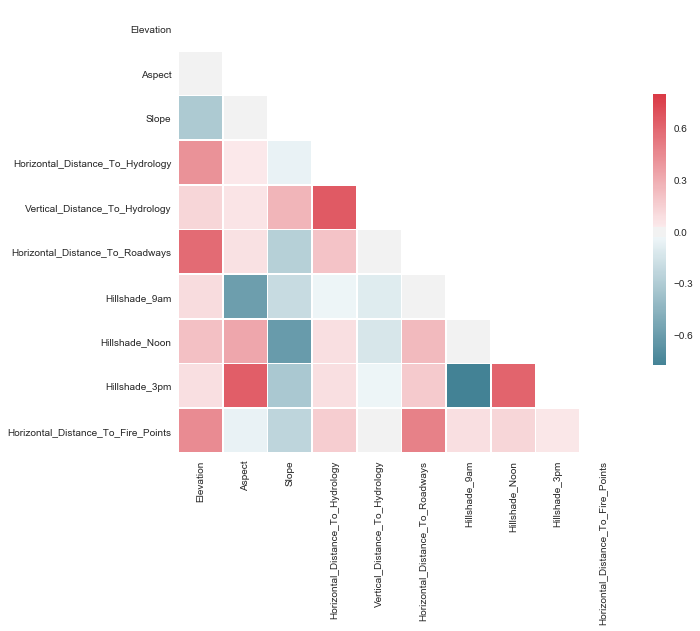

In [8]:
# First 10 data types are non-categorical variables. 

size = 10 

# Create a new dataframe with 10 columns
new_data=dataset.iloc[:,:size] 

# Store the columns
cols=new_data.columns 

# Get the correlation
Corr_Data = new_data.corr()

sns.set(style="white")
mask = np.zeros_like(Corr_Data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Matplotlib
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Corr_Data, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [9]:
# Pick only highly correlated ones. Threshold is 0.5
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): 
    for j in range(i+1,size): 
        if (Corr_Data.iloc[i,j] >= threshold and Corr_Data.iloc[i,j] < 1) or (Corr_Data.iloc[i,j] < 0 and Corr_Data.iloc[i,j] <= -threshold):
            corr_list.append([Corr_Data.iloc[i,j],i,j]) #store correlation and columns index

#Print correlations and column names
for v,i,j in corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

Elevation and Horizontal_Distance_To_Roadways = 0.58
Aspect and Hillshade_9am = -0.59
Aspect and Hillshade_3pm = 0.64
Slope and Hillshade_Noon = -0.61
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Hillshade_9am and Hillshade_3pm = -0.78
Hillshade_Noon and Hillshade_3pm = 0.61


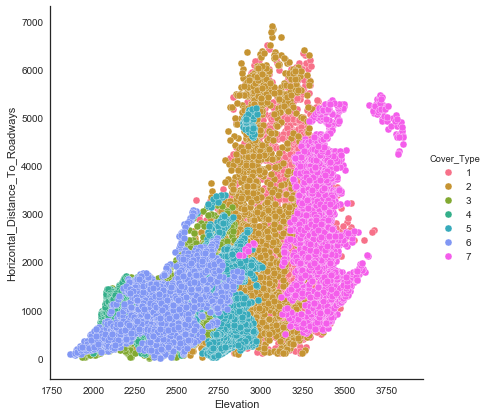

In [10]:
elev_hd = dataset[['Elevation','Horizontal_Distance_To_Roadways','Cover_Type']]
sns.pairplot(elev_hd,
             x_vars='Elevation',y_vars='Horizontal_Distance_To_Roadways',
             size=6,
             hue="Cover_Type")
plt.show()

Cover Type 2 seem to have huge variance in horizontal distance to roadways at around 3000 elevation. Cover type 7 has similar behavior

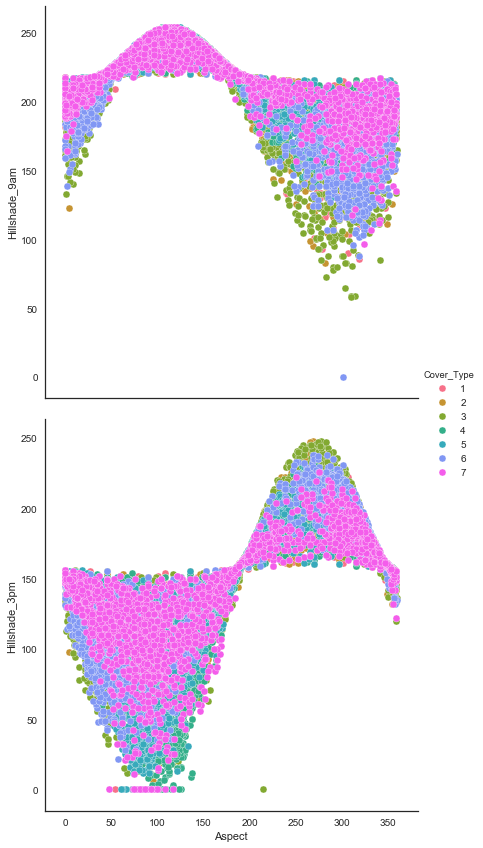

In [11]:
aspect_hs = dataset[['Aspect','Hillshade_9am','Hillshade_3pm','Cover_Type']]
sns.pairplot(aspect_hs,
             x_vars='Aspect',y_vars=['Hillshade_9am','Hillshade_3pm'],
             size=6,
             hue="Cover_Type")
plt.show()

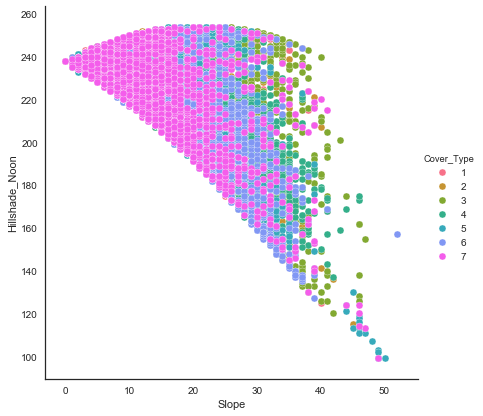

In [12]:
#Slope and Hillshade_Noon
slope_hs = dataset[['Slope','Hillshade_Noon','Cover_Type']]
sns.pairplot(slope_hs,
             x_vars='Slope',y_vars='Hillshade_Noon',
             size=6,
             hue="Cover_Type")
plt.show()

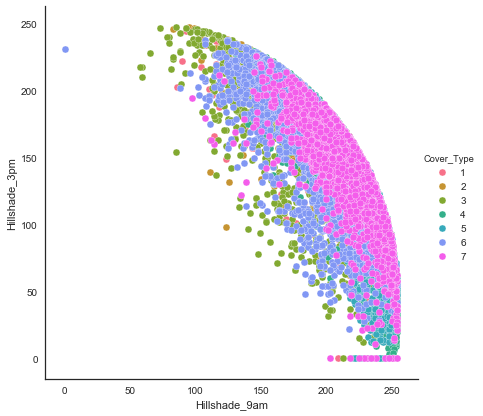

In [13]:
#Hillshade_9am and Hillshade_3pm
hs_hs = dataset[['Hillshade_9am','Hillshade_3pm','Cover_Type']]
sns.pairplot(hs_hs,
             x_vars='Hillshade_9am',y_vars='Hillshade_3pm',
             size=6,
             hue="Cover_Type")
plt.show()

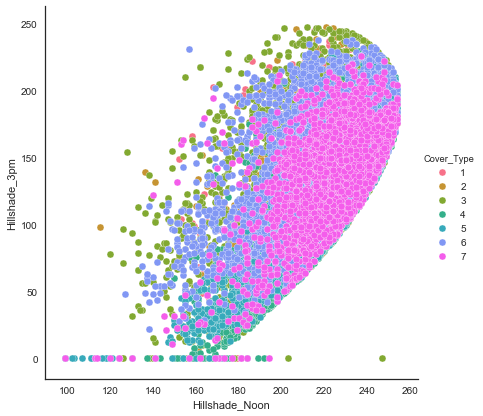

In [14]:
#Hillshade_Noon and Hillshade_3pm
hs_hs = dataset[['Hillshade_Noon','Hillshade_3pm','Cover_Type']]
sns.pairplot(hs_hs,
             x_vars='Hillshade_Noon',y_vars='Hillshade_3pm',
             size=6,
             hue="Cover_Type")
plt.show()

### Conclusions from the EDA

- Soil Types 7,8,15,25 can be removed as they don't have enough variance
- Hillshade 3 PM has strong correlation with Hillshade noon and Hillshade 9am. Hillshade 3 PM can be removed
- Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology both point to same distance. These variables can be normalized to one

## Data Cleaning

In [15]:
# Drop Soil Types 7,8,15,25 from train dataset and test dataset
dataset.drop(['Soil_Type7','Soil_Type8','Soil_Type15','Soil_Type25'], axis=1, inplace=True)
test_dataset_mod.drop(['Soil_Type7','Soil_Type8','Soil_Type15','Soil_Type25'], axis=1, inplace=True)

/Users/kurapati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Drop Hillshade_3PM from train dataset and test dataset
dataset.drop(['Hillshade_3pm'], axis=1, inplace=True)
test_dataset_mod.drop(['Hillshade_3pm'], axis=1, inplace=True)

/Users/kurapati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
print(dataset.shape)
print(test_dataset_mod.shape)

(15120, 50)
(565892, 49)


In [18]:
# Horizontal distance index is 3, and vertical distance index is 4. Need to normalize them
# Create a new column "Distance_To_Hydrology"

dataset['Distance_To_Hydrology'] = np.sqrt(dataset.iloc[:,4]**2 + dataset.iloc[:,3]**2)
# Now drop horizontal and vertical distance
dataset.drop(['Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology'],axis=1,inplace=True)

# Repeat the same for test dataset
test_dataset_mod['Distance_To_Hydrology'] = np.sqrt(test_dataset_mod.iloc[:,4]**2 + test_dataset_mod.iloc[:,3]**2)
test_dataset_mod.drop(['Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology'],axis=1,inplace=True)

/Users/kurapati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kurapati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [19]:
# Move the new column to the front
cols = list(dataset)
cols.insert(0, cols.pop(cols.index('Distance_To_Hydrology')))
cols

['Distance_To_Hydrology',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

In [20]:
dataset = dataset.loc[:, cols]

In [21]:
# Repeat the same for test dataset
cols = list(test_dataset_mod)
cols.insert(0, cols.pop(cols.index('Distance_To_Hydrology')))
test_dataset_mod = test_dataset_mod.ix[:, cols]

/Users/kurapati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [22]:
print(dataset.shape)
print(test_dataset_mod.shape)

(15120, 49)
(565892, 48)


In [23]:
list(test_dataset_mod)

['Distance_To_Hydrology',
 'Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40']

In [24]:
dataset['Distance_To_Hydrology'].describe()

count    15120.000000
mean       235.948778
std        215.491695
min          0.000000
25%         67.186308
50%        188.480768
75%        342.069071
max       1356.939571
Name: Distance_To_Hydrology, dtype: float64

### Split Data Into Train and Dev

In [25]:
r,c = dataset.shape
# Extract just the values from the dataset
array = dataset.values
X = array[:,0:(c-1)] # Take all but the last column as the inputs
Y = array[:,(c-1)] # Take the last column as the output (Cover_Type)
seed = 0
val_size = 0.1
X_train, X_dev, y_train, y_dev = cross_validation.train_test_split(X, Y, test_size=val_size, random_state=seed)

In [26]:
X_test = test_dataset_mod.values

In [27]:
print(np.shape(X_train))
print(np.shape(X_dev))
print(np.shape(X_test))

(13608, 48)
(1512, 48)
(565892, 48)


## Standardize Data

In [28]:
continuouscatbreakpoint = 8 # the first eight columns are continuous variables, the remainder are categorical
# STANDARD SCALER
SS = StandardScaler()
SS.fit(X_train[:,0:continuouscatbreakpoint])
X_temp = SS.transform(X_train[:,0:continuouscatbreakpoint])
X_dev_temp = SS.transform(X_dev[:,0:continuouscatbreakpoint])
# MINMAX SCALER
# X_temp = MinMaxScaler().fit_transform(X_train[:,0:continuouscatbreakpoint])
# X_dev_temp = MinMaxScaler().fit_transform(X_dev[:,0:continuouscatbreakpoint])
# Normalizer
# X_temp = Normalizer().fit_transform(X_train[:,0:continuouscatbreakpoint])
# X_dev_temp = Normalizer().fit_transform(X_dev[:,0:continuouscatbreakpoint])


X_train = np.concatenate((X_temp,X_train[:,continuouscatbreakpoint:]),axis=1)
X_dev = np.concatenate((X_dev_temp,X_dev[:,continuouscatbreakpoint:]),axis=1)
# EXAMINE THAT ONLY CONTINUOUS VARIABLES WERE CHANGED AND THAT COLUMNS ARE STILL CORRECT
df = pd.DataFrame(X_train)
df.columns = dataset.columns[:-1]
display(df.describe())



,Distance_To_Hydrology,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,1.360800e+04,1.360800e+04,1.360800e+04,1.360800e+04,1.360800e+04,1.360800e+04,1.360800e+04,1.360800e+04,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000
mean,9.798485e-15,1.514135e-16,-1.048054e-16,6.504040e-17,-6.336993e-17,-4.263035e-16,-4.038265e-16,3.639554e-17,0.236772,0.032701,0.420929,0.309597,0.023589,0.041887,0.063566,0.054306,0.011243,0.042622,0.000735,0.142269,0.027116,0.015579,0.032040,0.010949,0.007496,0.040491,0.003821,0.003233,0.008377,0.001029,0.022487,0.049824,0.016975,0.003307,0.001029,0.000588,0.085024,0.048354,0.021752,0.045708,0.040785,0.001543,0.006687,0.000661,0.001984,0.049603,0.043504,0.029688
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,0.425117,0.177860,0.493726,0.462345,0.151771,0.200339,0.243986,0.226629,0.105441,0.202011,0.027099,0.349339,0.162429,0.123845,0.176113,0.104069,0.086255,0.197115,0.061701,0.056773,0.091147,0.032060,0.148266,0.217588,0.129183,0.057412,0.032060,0.024240,0.278927,0.214521,0.145878,0.208860,0.197799,0.039255,0.081505,0.025710,0.044501,0.217132,0.203996,0.169733
min,-1.095691e+00,-2.123322e+00,-1.427567e+00,-1.956728e+00,-1.294376e+00,-6.948287e+00,-5.243029e+00,-1.375208e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.838241e-01,-8.942714e-01,-8.371228e-01,-7.739559e-01,-7.206432e-01,-5.467442e-01,-5.199470e-01,-7.116440e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.173779e-01,5.355184e-03,-2.830136e-01,-1.825700e-01,-3.015224e-01,2.371182e-01,1.579027e-01,-2.308801e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.879763e-01,8.474823e-01,9.432936e-01,6.453703e-01,4.201915e-01,7.270321e-01,7.045557e-01,4.354258e-01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [29]:
# Repeat for test data
X_test_temp = SS.transform(X_test[:,0:continuouscatbreakpoint])
X_test = np.concatenate((X_test_temp,X_test[:,continuouscatbreakpoint:]),axis=1)

## Baselines
 We will run a few baselines to get a sense of the complexity in the data.
1.  The DummyClassifier Package
2. We will predict based on the most common tree by soil_type.

In [41]:
# We will use these pandas dataframes of the training and dev data for some baselines
dataset_train = pd.DataFrame(data=(X_train))
dataset_train['Cover_Type'] = pd.Series(y_train)
dataset_train.columns = dataset.columns

dataset_dev = pd.DataFrame(data=(X_dev))
dataset_dev['Cover_Type'] = pd.Series(y_dev)
dataset_dev.columns = dataset.columns

dataset_test = pd.DataFrame(data=(X_test))
dataset_test.columns = dataset.columns[:-1]

### DummyClassifier

In [30]:
# Run the various dummy classification strategies
dummy_mf = DummyClassifier(strategy='most_frequent',random_state=0)
dummy_mf.fit(X_train, y_train)
print("Most Frequent ",dummy_mf.score(X_dev, y_dev))

dummy_st = DummyClassifier(strategy='stratified', random_state=0)
dummy_st.fit(X_train, y_train)
print("Stratified", dummy_st.score(X_dev, y_dev))

dummy_pr = DummyClassifier(strategy='prior', random_state=0)
dummy_pr.fit(X_train, y_train)
print("Prior", dummy_pr.score(X_dev, y_dev))

dummy_un = DummyClassifier(strategy='uniform', random_state=0)
dummy_un.fit(X_train, y_train)
print("Uniform", dummy_un.score(X_dev, y_dev))

Most Frequent  0.13227513227513227
Stratified 0.15542328042328044
Prior 0.13227513227513227
Uniform 0.1335978835978836


### Predicting by soil_type
This naive strategy simply tallies the cover_type for each soil type. Then when predicting on new data, it simply predicts the most common cover_type for the soil_type in the new data.

In [42]:
# Undo one hot encoding
def get_soil(row):
    for c in dataset_train.columns[12:]:
        if row[c]==1:
            return c
dataset_train['Soil_Type'] = dataset_train.apply(get_soil, axis=1)
dataset_dev['Soil_Type'] = dataset_dev.apply(get_soil, axis=1)

def get_soil_test(row):
    for c in dataset_test.columns[12:]:
        if row[c]==1:
            return c

dataset_test['Soil_Type'] = dataset_test.apply(get_soil_test, axis=1)

In [43]:
dataset_train.sort_values("Soil_Type") # add column for soil_type
soil_counts = dataset_train.groupby('Soil_Type').Cover_Type.apply(lambda x: x.mode()) # Find the most common cover_type by soil_type
# Clean up index
soil_counts = pd.DataFrame(soil_counts)
soil_counts.reset_index(inplace=True)
soil_counts.drop("level_1",axis=1, inplace=True)
# Add column labels
soil_counts.columns = ["Soil_Type","Most_Frequent_By_Soil_Type"]

# Assign the predicted cover_type to each datapoint
dataset_train = dataset_train.merge(soil_counts[["Soil_Type","Most_Frequent_By_Soil_Type"]],on=["Soil_Type"])
dataset_dev = dataset_dev.merge(soil_counts[["Soil_Type","Most_Frequent_By_Soil_Type"]],on=["Soil_Type"])

# this is moving covertype so it is on the end of the dataframe
df1 = dataset_train.pop('Cover_Type') # remove column b and store it in df1
dataset_train['Cover_Type'] = df1
df1 = dataset_dev.pop('Cover_Type') # remove column b and store it in df1
dataset_dev['Cover_Type'] = df1

# Calculate the accuracy of this strategy
correct = 0
for row in range(dataset_dev.shape[0]):
    if dataset_dev.iloc[row]["Cover_Type"] == dataset_dev.iloc[row]["Most_Frequent_By_Soil_Type"]:
        correct += 1
    else:
        pass
correct / dataset_dev.shape[0]

0.5720899470899471

In [44]:
d = dataset_test.merge(soil_counts[["Soil_Type","Most_Frequent_By_Soil_Type"]],on=["Soil_Type"], how='outer')
test_pred_baseline = d.loc[:,'Most_Frequent_By_Soil_Type']
test_pred_baseline = test_pred_baseline.fillna(7) # since there are soil types not covered in the training data, the NaNs are replaced by Cover_type 7 which is the most frequent in our training data
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_baseline}))
test_results.Cover_Type= test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_baseline.csv",index=False)

# Stacked Classifier with Extra Trees and SVM : Our best model

We now display our best model here based on our research on evaluating various models. The details on other models are described after this section. We first show the construction of each base model in the classifier then the classifier itself.

## SVMs

In [37]:
svc_clf = SVC(kernel='rbf',random_state=0)
svc_clf.fit(X_train,y_train)
pred = svc_clf.predict(X_dev)
accuracy = np.mean(pred==y_dev)
print("Accuracy with Kernel SVM: ",accuracy)

Accuracy with Kernel SVM:  0.7255291005291006


In [41]:
parameters = {
    'C': [0.1,1,10,100,10000],
}

gs_svm = GridSearchCV(SVC(kernel='rbf',random_state=0),param_grid = parameters)
gs_svm.fit(X_train, y_train)
print("The best parameters are: ",gs_svm.best_params_)
print("The best score is: ",gs_svm.best_score_)

The best parameters are:  {'C': 10000}
The best score is:  0.8241475602586714


In [49]:
# best_svm = SVC(
#      C=gs_svm.best_params_['C'] # 100
#                                 )

best_svm = SVC(
     C= 10000,probability=True
                                )
best_svm.fit(X_train, y_train)
accuracy_svm = accuracy_score(y_dev,best_svm.predict(X_dev))
print("Accuracy on dev set: ",accuracy_svm)
test_pred_svm = best_svm.predict(X_test)

Accuracy on dev set:  0.832671957672


In [50]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_svm}))
test_results.Cover_Type = test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_svm.csv",index=False)

## Extra Trees

In [30]:
# Untuned Extra Trees
et_clf = ExtraTreesClassifier(random_state=0)
et_clf.fit(X_train, y_train)
pred = et_clf.predict(X_dev)
accuracy = accuracy_score(y_dev,pred)
print("Accuracy with Untuned Extra Trees: ",accuracy)

Accuracy with Untuned Extra Trees:  0.844576719577


In [31]:
# Gridsearch for best parameters
parameters = {
    'criterion':['gini','entropy'],
    'n_estimators': [10,50,100,250,500],
    'max_features': ['auto','log2',None],
    'min_samples_split':[2,3,4]
}

gs_et = GridSearchCV(ExtraTreesClassifier(random_state=0),param_grid = parameters)
gs_et.fit(X_train, y_train)
print("The best parameters are: ",gs_et.best_params_)
print("The best score is: ",gs_et.best_score_)

The best parameters are:  {'criterion': 'entropy', 'max_features': None, 'min_samples_split': 3, 'n_estimators': 250}
The best score is:  0.8672839506172839


In [32]:
best_et = ExtraTreesClassifier(
    criterion= 'entropy',
    max_features= None,
    min_samples_split= 3,
    n_estimators= 250,
    random_state= 0
                                )

best_et.fit(X_train, y_train)
accuracy_et = accuracy_score(y_dev,best_et.predict(X_dev))
print("Dev Set Accuracy Extra Trees: ",accuracy_et)
test_pred_et = best_et.predict(X_test)

Dev Set Accuracy Extra Trees:  0.874338624339


In [33]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_et}))
test_results.Cover_Type = test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_et.csv",index=False)

Our test accuracy with Extra Trees is 0.77021

## Stacking Extra Trees and SVM Produced the best result

In [60]:
sclf_2 = StackingClassifier(classifiers=[best_svm, best_et], 
                          meta_classifier=best_lr,
                         use_probas=True,use_features_in_secondary=True)
sclf_2.fit(X_train,y_train)
pred = sclf_2.predict(X_dev)
accuracy = np.mean(pred==y_dev)
print("Accuracy with Stacked classifier: ",accuracy)
test_pred_sclf_2 = sclf.predict(X_test)

Accuracy with Stacked classifier:  0.878306878307


In [61]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_sclf_2}))
test_results.Cover_Type = test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_sclf_2.csv",index=False)

Our test accuracy with this stacked classifier is 0.77349

# Exploring different models


## Decision Trees

In [29]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf.predict(X_dev)
accuracy = accuracy_score(pred,y_dev)
print("Dev Set Accuracy with Untuned Decision Tree: ",accuracy)

Dev Set Accuracy with Untuned Decision Tree:  0.7817460317460317


In [30]:
parameters = {'criterion':['gini','entropy'],'max_depth': np.arange(6,49),'max_features':['auto','log2',None],"min_samples_split":np.arange(2, 5)}

gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid = parameters)
gs_dt.fit(X_train, y_train)
print("The best parameters are: ",gs_dt.best_params_)
print("The best score is: ",gs_dt.best_score_)

The best parameters are:  {'criterion': 'gini', 'max_depth': 17, 'max_features': None, 'min_samples_split': 2}
The best score is:  0.7763080540858318


In [30]:
# best_dt = DecisionTreeClassifier(
#     criterion=gs_dt.best_params_['criterion'], # 'gini'   
#     max_depth=gs_dt.best_params_['max_depth'], # 17
#     max_features=gs_dt.best_params_['max_features'], # None
#     min_samples_split=gs_dt.best_params_['min_samples_split'], # 2
#     random_state=0
#                                 )

best_dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=17,
    max_features= None,
    min_samples_split=2,
    random_state=0
                                )

best_dt.fit(X_train, y_train)
accuracy_dt = accuracy_score(y_dev,best_dt.predict(X_dev))
print("Dev Set Decision Tree Accuracy: ", accuracy_dt)
test_pred_dt = best_dt.predict(X_test)

Dev Set Decision Tree Accuracy:  0.7817460317460317


In [32]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_dt}))
test_results.Cover_Type= test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_dt.csv",index=False)

## Random Forest

In [34]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_dev)
accuracy = accuracy_score(y_dev, pred)
print("Accuracy with Untuned Random Forest: ",accuracy)

Accuracy with Untuned Random Forest:  0.828703703704


In [35]:
parameters = {
    'n_estimators': [10,25,50,100,250,500],
    'max_features': ['auto','log2',None],
    'criterion':['gini','entropy']
}

gs_rf = GridSearchCV(RandomForestClassifier(random_state=0),param_grid = parameters)
gs_rf.fit(X_train, y_train)
print("The best parameters are: ",gs_rf.best_params_)
print("The best score is: ",gs_rf.best_score_)

The best parameters are:  {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 500}
The best score is:  0.8568489124044679


In [46]:
# best_rf = RandomForestClassifier(
#     criterion=gs_rf.best_params_['criterion'], # 'gini'
#     n_estimators=gs_rf.best_params_['n_estimators'], # 500
#     max_features=gs_rf.best_params_['max_features'], # 'auto'
#     random_state=0
#                                 )
best_rf = RandomForestClassifier(
    criterion= 'gini',
    n_estimators= 500,
    max_features= 'auto',
    random_state=0
                                )
best_rf.fit(X_train, y_train)
accuracy_rf = accuracy_score(y_dev,best_rf.predict(X_dev))
print("Dev Set Random Forest Accuracy: ",accuracy_rf)
test_pred_rf = best_rf.predict(X_test)

Dev Set Random Forest Accuracy:  0.8558201058201058


In [47]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_rf}))
test_results.Cover_Type = test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_rf.csv",index=False)

## Adaboost

In [36]:
bdt_clf = AdaBoostClassifier(DecisionTreeClassifier(random_state=0),algorithm='SAMME', random_state=0)
bdt_clf.fit(X_train, y_train)
pred = bdt_clf.predict(X_dev)
accuracy_bdt = accuracy_score(y_dev,pred)
print("Accuracy with Untuned Boosted Decision Tree: ", accuracy_bdt)

Accuracy with Untuned Boosted Decision Tree:  0.774470899471


In [37]:
parameters = {
    'n_estimators':[50, 250],
    'base_estimator__criterion' : ['gini','entropy'],
    'base_estimator__max_depth' : np.arange(7,20),
    'base_estimator__max_features' : ['auto',None]

}

gs_bdt = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(random_state=0),algorithm='SAMME', random_state=0),param_grid = parameters)
gs_bdt.fit(X_train, y_train)
print("The best parameters are: ",gs_bdt.best_params_)
print("The best score is: ",gs_bdt.best_score_)

The best parameters are:  {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 13, 'base_estimator__max_features': None, 'n_estimators': 250}
The best score is:  0.8655937683715461


In [38]:
best_bdt = AdaBoostClassifier(DecisionTreeClassifier( criterion='gini', max_depth=13, max_features= None, min_samples_split=2,random_state=0),
                              n_estimators=250, 
                              random_state=0)
                              
best_bdt.fit(X_train, y_train)
accuracy_bdt = accuracy_score(y_dev, best_bdt.predict(X_dev))
print("Accuracy on dev set: ",accuracy_bdt)
test_pred_bdt = best_bdt.predict(X_test)

Accuracy on dev set:  0.863095238095


In [68]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_bdt}))
test_results.Cover_Type = test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_bdt.csv",index=False)

# KNNs

In [39]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
pred = knn_clf.predict(X_dev)
accuracy = accuracy_score(y_dev,pred)
print("Accuracy with Untuned KNN: ",accuracy)

Accuracy with Untuned KNN:  0.791666666667


In [53]:
parameters = {
    'n_neighbors': [1,3,5,7,9,11,13,15],
    'weights': ['uniform','distance']
}

gs_knn = GridSearchCV(KNeighborsClassifier(),param_grid = parameters)
gs_knn.fit(X_train, y_train)
print("The best parameters are: ",gs_knn.best_params_)
print("The best score is: ",gs_knn.best_score_)

The best parameters are:  {'n_neighbors': 1, 'weights': 'uniform'}
The best score is:  0.7952674897119342


In [54]:
# best_knn = KNeighborsClassifier(
#     n_neighbors=gs_knn.best_params_['n_neighbors'], # 1
#     weights=gs_knn.best_params_['weights'] # 'uniform'
#                                 )

best_knn = KNeighborsClassifier(
    n_neighbors= 1,
    weights= 'uniform'
                                )
best_knn.fit(X_train, y_train)
accuracy_knn = accuracy_score(y_dev, best_knn.predict(X_dev))
print("Dev set accuracy with Nearest Neighbors: ",accuracy_knn)
test_pred_knn = best_knn.predict(X_test)

Dev set accuracy with Nearest Neighbors:  0.8201058201058201


In [55]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_knn}))
test_results.Cover_Type = test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_knn.csv",index=False)

# Logistic Regression

In [ ]:
dataset_train.groupby('Cover_Type').size()

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_dev)
accuracy = accuracy_score(y_dev, pred)
print("Accuracy with Untuned LogisticRegression: ",accuracy)

In [ ]:
parameters = {
    'C':[0.01,0.1,1,10],
    'penalty':['l2'],
    'solver':['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'] 
              }

gs_lr = GridSearchCV(LogisticRegression(max_iter=1000),param_grid = parameters)
gs_lr.fit(X_train, y_train)
print("The best parameters are: ",gs_lr.best_params_)
print("The best score is: ",gs_lr.best_score_)

In [57]:
best_lr = LogisticRegression(
    C=10,
    penalty='l2',
    solver= 'liblinear',
    max_iter=1000
                                )
best_lr.fit(X_train, y_train)
accuracy_lr = accuracy_score(y_dev,best_lr.predict(X_dev))
print("Dev set accuracy with Logistic Regression: ", accuracy_lr)
test_pred_lr = best_lr.predict(test_dataset_mod)

Dev set accuracy with Logistic Regression:  0.664682539683


In [57]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_lr}))
test_results.Cover_Type = test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_lr.csv",index=False)

## XGboost

In [40]:
xdt = XGBClassifier(max_depth=10,n_estimators=100)
xdt.fit(X_train,y_train)
pred = xdt.predict(X_dev)
accuracy = np.mean(pred==y_dev)
print("Accuracy with XGBoost is: ",accuracy)

Accuracy with XGBoost is:  0.861111111111


In [44]:
cv = StratifiedKFold(y_train, n_folds=10, shuffle=True)

params_dist_grid = {
    'max_depth': [1, 5, 10],
    'gamma': [0, 0.5, 1],
    'n_estimators': randint(1, 1001), # uniform discrete random distribution
    'learning_rate': uniform(), # gaussian distribution
    'subsample': uniform(), # gaussian distribution
    'colsample_bytree': uniform(), # gaussian distribution
    'reg_lambda':uniform(),
    'reg_alpha':uniform()
    }

xgbc_fixed = {'booster':['gbtree'], 'silent':1}

bst_gridd = RandomizedSearchCV(estimator=XGBClassifier(*xgbc_fixed), param_distributions=params_dist_grid,\
                               scoring='accuracy', cv=cv, n_jobs=-1)

bst_gridd.fit(X_train, y_train)
bst_gridd.grid_scores_

print ('Best accuracy obtained: {}'.format(bst_gridd.best_score_))
print ('Parameters:')
for key, value in bst_gridd.best_params_.items():
    print('\t{}:{}'.format(key,value))
       

Best accuracy obtained: 0.8603027630805409
Parameters:
	colsample_bytree:0.6888934235035213
	gamma:1
	learning_rate:0.2270636446088411
	max_depth:10
	n_estimators:808
	reg_alpha:0.8590115011595506
	reg_lambda:0.9306549208151742
	subsample:0.6837181130344058


In [46]:
best_xgbc = XGBClassifier(n_estimators=808,learning_rate=0.23,max_depth=10,gamma=1,nthread=-1,\
                    reg_alpha = 0.86, reg_lambda= 0.93, max_delta_step = 1, subsample = 0.683, colsample_bytree = 0.688)
best_xgbc.fit(X_train,y_train)
accuracy_xgbc = accuracy_score(y_dev,best_xgbc.predict(X_dev))
print("Accuracy on dev set: ",accuracy_xgbc)
test_pred_xgbc = best_xgbc.predict(X_test)


Accuracy on dev set:  0.841931216931


The post tuning accuracy of XGBoost on dev set is lesser than pre-tuning. Proceeding with test set anyway!

In [47]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_xgbc}))
test_results.Cover_Type = test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_xgbc.csv",index=False)

## Other Ensembles

In [51]:
# Voting classifier between SVM and Extra Trees
v_svm_et = VotingClassifier(estimators=[('SVM', best_svm), ('ET', best_et)],voting='soft',weights=[1,2])
v_svm_et.fit(X_train,y_train)
pred = v_svm_et.predict(X_dev)
accuracy = np.mean(pred==y_dev)
print("Accuracy with SVM and Extra Trees: ",accuracy)
test_pred_svm_et = v_svm_et.predict(X_test)

Accuracy with SVM and Extra Trees:  0.873677248677


In [52]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_svm_et}))
test_results.Cover_Type = test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_v_svm_et.csv",index=False)

In [53]:
v_svm_bt = VotingClassifier(estimators=[('SVM', best_svm), ('ABC', best_bdt)], voting='hard',weights=[2,3])
v_svm_bt.fit(X_train,y_train)
pred = v_svm_bt.predict(X_dev)
accuracy = np.mean(pred==y_dev)
print("Accuracy with SVM and Adaboost: ",accuracy)
test_pred_svm_bt = v_svm_bt.predict(X_test)

Accuracy with SVM and Adaboost:  0.863095238095


In [55]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_svm_bt}))
test_results.Cover_Type = test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_v_svm_bt.csv",index=False)

In [58]:
sclf = StackingClassifier(classifiers=[best_svm, best_et], 
                          meta_classifier=best_lr,
                         use_probas=True)
sclf.fit(X_train,y_train)
pred = sclf.predict(X_dev)
accuracy = np.mean(pred==y_dev)
print("Accuracy with Stacked classifier: ",accuracy)
test_pred_sclf = sclf.predict(X_test)

Accuracy with Stacked classifier:  0.87962962963


In [59]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred_sclf}))
test_results.Cover_Type = test_results.Cover_Type.astype(int)
test_results.to_csv("Submission_sclf.csv",index=False)

## Using PCA for dimensionality Reduction

In [ ]:
def number_of_parameters(num_pca, num_gmm, cov_type, num_classes=2):
    # Most of this work is derived from http://trace.tennessee.edu/cgi/viewcontent.cgi?article=2096&context=utk_gradthes
    # We will consider the models where volume is not varied between the GMM components.
    
    # Define general variables as per the formula:
    K = num_gmm
    p = num_pca
    alpha = K*p + K - 1
    beta = p*(p+1)/2
     
    if cov_type == 'spherical':
        # This is a diagonal Matrix with equal diagonal elements
        # The volume of the diagonal does not vary between each GMM component
        # Number of parameters is alpha + 1, which also expands to ((num_pca + 1)*num_gmm)*num_classes upon substitution
        num_parameters = (alpha + 1)*num_classes
    elif cov_type == 'diag':
        # This is a diagonal Matrix with diagnoal elements varying. Shape of the clusters vary but not the volume.
        # Number of parameters is alpha+K*p+1 which expands to (2*num_pca)*num_gmm*num_classes
        num_parameters = (alpha + (K*p) - K + 1)*num_classes
    elif cov_type == 'full':
        # This is a full representation where orientation and shape vary among equal volume clusters
        num_parameters = (alpha + K*beta - (K-1))*num_classes
    elif cov_type == 'tied':
        # This is a special model where a single covariance matrix is choosen among multiple models.
        num_parameters = ((K*p) + beta)*num_classes

    return num_parameters

cov_matrix_list = ['spherical', 'diag', 'tied', 'full']
pca_components_list = list(range(12,31))
gmm_components_list = list(range(2,11))

# Create a pandas data frame that stores all the variables

df_columns = ['pca_n_components','gmm_n_components','cov_matrix_type','total_params','accuracy']
df1 = pd.DataFrame(columns=df_columns)

for n_pca in pca_components_list:
    # This is the outer loop for PCA n_components
    pca = PCA(n_components=n_pca)
    pca.fit(X_train)
    principalComponents = pca.transform(X_train)
    #Tranform test data with same pca
    pca_test = pca.transform(X_dev)

    # Create a pandas dataframe
    pcaDF = pd.DataFrame(data = principalComponents)
    pcaDF['Target'] = y_train

    # Separate each class
    pcaDF_1 = pcaDF[pcaDF['Target']==1]
    pcaDF_2 = pcaDF[pcaDF['Target']==2]
    pcaDF_3 = pcaDF[pcaDF['Target']==3]
    pcaDF_4 = pcaDF[pcaDF['Target']==4]
    pcaDF_5 = pcaDF[pcaDF['Target']==5]
    pcaDF_6 = pcaDF[pcaDF['Target']==6]
    pcaDF_7 = pcaDF[pcaDF['Target']==7]
    
    # Drop the target column
    pcaDF_1.drop('Target',axis=1,inplace=True)
    pcaDF_2.drop('Target',axis=1,inplace=True)
    pcaDF_3.drop('Target',axis=1,inplace=True)
    pcaDF_4.drop('Target',axis=1,inplace=True)
    pcaDF_5.drop('Target',axis=1,inplace=True)
    pcaDF_6.drop('Target',axis=1,inplace=True)
    pcaDF_7.drop('Target',axis=1,inplace=True)
    
    # Convert back to numpy
    pca_1 = pcaDF_1.as_matrix(columns=None)
    pca_2 = pcaDF_2.as_matrix(columns=None)
    pca_3 = pcaDF_3.as_matrix(columns=None)
    pca_4 = pcaDF_4.as_matrix(columns=None)
    pca_5 = pcaDF_5.as_matrix(columns=None)
    pca_6 = pcaDF_6.as_matrix(columns=None)
    pca_7 = pcaDF_7.as_matrix(columns=None)
        
    # Start the Index 0
    Index = 0
    # Inner loop for Number of GMM
    for n_gmm in gmm_components_list:
        for cov_matrix in cov_matrix_list:
            # Check if number of parameters are higher than 50
            n_param = number_of_parameters(n_pca, n_gmm, cov_matrix)
            
            if(n_param>1200):
                continue
                
            # GMM for class 1
            clf_1 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
            clf_1.fit(pca_1)

            # GMM for class 2
            clf_2 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
            clf_2.fit(pca_2)
            
            # GMM for class 3
            clf_3 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
            clf_3.fit(pca_3)

            # GMM for class 4
            clf_4 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
            clf_4.fit(pca_4)
            
            # GMM for class 5
            clf_5 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
            clf_5.fit(pca_5)

            # GMM for class 6
            clf_6 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
            clf_6.fit(pca_6)
            
            # GMM for class 7
            clf_7 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
            clf_7.fit(pca_7)
            
            # Log likelihood for positive data
            clf1_ll = clf_1.score_samples(pca_test)

            # Log likelihood for negative data
            clf2_ll = clf_2.score_samples(pca_test)
            
            # Log likelihood for positive data
            clf3_ll = clf_3.score_samples(pca_test)

            # Log likelihood for negative data
            clf4_ll = clf_4.score_samples(pca_test)
            
            # Log likelihood for positive data
            clf5_ll = clf_5.score_samples(pca_test)

            # Log likelihood for negative data
            clf6_ll = clf_6.score_samples(pca_test)
            
            # Log likelihood for positive data
            clf7_ll = clf_7.score_samples(pca_test)
            
            ll_df = pd.DataFrame({1:clf1_ll, 2:clf2_ll, 3:clf3_ll, 4:clf4_ll, 5:clf5_ll, 6:clf6_ll, 7:clf7_ll})
            
            ll_df['max_class'] = ll_df.idxmax(axis=1)
            
            test_pred = ll_df.as_matrix(columns=['max_class'])
            test_pred = test_pred.flatten()

            accuracy = np.mean(np.array(test_pred)==y_dev)
            df1.loc[Index] = [n_pca,n_gmm,cov_matrix,n_param,accuracy]
            Index+=1

print(df1)
print("\nThe best accuracy is achieved by the below: ")
df1.loc[df1['accuracy'].idxmax()] 


In [ ]:
pca = PCA(n_components=28)
pca.fit(X_train)
principalComponents = pca.transform(X_train)
#Tranform test data with same pca
pca_test = pca.transform(X_test)

# Create a pandas dataframe
pcaDF = pd.DataFrame(data = principalComponents)
pcaDF['Target'] = y_train

# Separate each class
pcaDF_1 = pcaDF[pcaDF['Target']==1]
pcaDF_2 = pcaDF[pcaDF['Target']==2]
pcaDF_3 = pcaDF[pcaDF['Target']==3]
pcaDF_4 = pcaDF[pcaDF['Target']==4]
pcaDF_5 = pcaDF[pcaDF['Target']==5]
pcaDF_6 = pcaDF[pcaDF['Target']==6]
pcaDF_7 = pcaDF[pcaDF['Target']==7]

# Drop the target column
pcaDF_1.drop('Target',axis=1,inplace=True)
pcaDF_2.drop('Target',axis=1,inplace=True)
pcaDF_3.drop('Target',axis=1,inplace=True)
pcaDF_4.drop('Target',axis=1,inplace=True)
pcaDF_5.drop('Target',axis=1,inplace=True)
pcaDF_6.drop('Target',axis=1,inplace=True)
pcaDF_7.drop('Target',axis=1,inplace=True)

# Convert back to numpy
pca_1 = pcaDF_1.as_matrix(columns=None)
pca_2 = pcaDF_2.as_matrix(columns=None)
pca_3 = pcaDF_3.as_matrix(columns=None)
pca_4 = pcaDF_4.as_matrix(columns=None)
pca_5 = pcaDF_5.as_matrix(columns=None)
pca_6 = pcaDF_6.as_matrix(columns=None)
pca_7 = pcaDF_7.as_matrix(columns=None)

n_gmm = 10
cov_matrix = "diag"

clf_1 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
clf_1.fit(pca_1)

# GMM for class 2
clf_2 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
clf_2.fit(pca_2)

# GMM for class 3
clf_3 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
clf_3.fit(pca_3)

# GMM for class 4
clf_4 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
clf_4.fit(pca_4)

# GMM for class 5
clf_5 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
clf_5.fit(pca_5)

# GMM for class 6
clf_6 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
clf_6.fit(pca_6)

# GMM for class 7
clf_7 = mixture.GaussianMixture(n_components=n_gmm, covariance_type=cov_matrix)
clf_7.fit(pca_7)

# Log likelihood for positive data
clf1_ll = clf_1.score_samples(pca_test)

# Log likelihood for negative data
clf2_ll = clf_2.score_samples(pca_test)

# Log likelihood for positive data
clf3_ll = clf_3.score_samples(pca_test)

# Log likelihood for negative data
clf4_ll = clf_4.score_samples(pca_test)

# Log likelihood for positive data
clf5_ll = clf_5.score_samples(pca_test)

# Log likelihood for negative data
clf6_ll = clf_6.score_samples(pca_test)

# Log likelihood for positive data
clf7_ll = clf_7.score_samples(pca_test)

ll_df = pd.DataFrame({1:clf1_ll, 2:clf2_ll, 3:clf3_ll, 4:clf4_ll, 5:clf5_ll, 6:clf6_ll, 7:clf7_ll})

ll_df['max_class'] = ll_df.idxmax(axis=1)

test_pred = ll_df.as_matrix(columns=['max_class'])
test_pred = test_pred.flatten()

## Predicting real test data

In [ ]:
#test_pred = bdt.predict(X_test)
#test_pred = sclf.predict(X_test)
test_pred = eclf_bt_svm.predict(X_test)
#test_pred = eclf.predict(X_test)
#test_pred = sclf_2.predict(X_test)
#test_pred = XGBC_mod.predict(X_test)

In [ ]:
np.shape(test_pred)

In [ ]:
test_results = pd.DataFrame(OrderedDict({'Id':ids,'Cover_Type':test_pred}))
test_results

In [ ]:
test_results.Cover_Type = test_results.Cover_Type.astype(int)

In [ ]:
test_results.to_csv("Submission.csv",index=False)

In [ ]:
np.unique(test_results.iloc[:,1])